# **Kelompok 149**

## **Departemen Marketing - Meningkatkan Jumlah User Pada Perusahaan**
Perusahaan The Look E - Commerce berencana ingin meningkatkan jumlah user di setiap negara. Proses ini akan dilaksanakan setiap tahun guna mendapatkan hasil yang lebih maksimal. Untuk melakukan hal tersebut marketing akan melakukan research di setiap negara yang telah menjadi user, pada tahap awal marketing akan melihat data pada “created_at” dan “country” untuk menyeleksi daerah mana saja yang perlu peningkatan user lebih banyak. Selain itu marketing akan melakukan promosi lebih banyak di berbagai media social.

**Alfendo Rizky Syachputra - DBA2007820**

# **Checkpoint 2 - Data Understanding**
● Menjelaskan deskripsi dari dataset tiap departemen melalui Exploratory Data Analysis

● Menunjukkan hasil dari transformasi data

● Telah menentukan independent/dependent variabel dalam sebelum masuk ke Modeling

● Mempresentasikan visualisasi (jika ada)

In [ ]:
# importing library
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# mounting drive for importing dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing dataset
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final.csv')

In [ ]:
# melihat data awal
df.head()

,id,age,gender,country,latitude,longtitude,traffic_source,created_at,num_of_item
0,77905,70,M,United States,64.748506,-147.342360,Facebook,2022-02-26,4
1,77905,70,M,United States,64.748506,-147.342360,Facebook,2022-02-26,1
2,60393,70,F,China,28.230143,112.973400,Search,2021-04-26,1
3,60393,70,F,China,28.230143,112.973400,Search,2021-04-26,1
4,43215,70,M,Brasil,-10.251140,-40.709464,Search,2021-09-27,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124512 entries, 0 to 124511
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              124512 non-null  int64  
 1   age             124512 non-null  int64  
 2   gender          124512 non-null  object 
 3   country         124512 non-null  object 
 4   latitude        124512 non-null  float64
 5   longtitude      124512 non-null  float64
 6   traffic_source  124512 non-null  object 
 7   created_at      124512 non-null  object 
 8   num_of_item     124512 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 8.5+ MB


In [ ]:
# menghitung jumlah kolom pada dataset
df.shape

(124512, 9)

In [ ]:
# mengubah type object pada created_at menjadi datetime
df['created_at'] = pd.to_datetime(df['created_at'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124512 entries, 0 to 124511
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              124512 non-null  int64         
 1   age             124512 non-null  int64         
 2   gender          124512 non-null  object        
 3   country         124512 non-null  object        
 4   latitude        124512 non-null  float64       
 5   longtitude      124512 non-null  float64       
 6   traffic_source  124512 non-null  object        
 7   created_at      124512 non-null  datetime64[ns]
 8   num_of_item     124512 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 8.5+ MB


In [ ]:
df = df[['id', 'age', 'gender', 'country', 'latitude', 'longtitude', 'traffic_source', 'created_at', 'num_of_item']]
df

,id,age,gender,country,latitude,longtitude,traffic_source,created_at,num_of_item
0,77905,70,M,United States,64.748506,-147.342360,Facebook,2022-02-26,4
1,77905,70,M,United States,64.748506,-147.342360,Facebook,2022-02-26,1
2,60393,70,F,China,28.230143,112.973400,Search,2021-04-26,1
3,60393,70,F,China,28.230143,112.973400,Search,2021-04-26,1
4,43215,70,M,Brasil,-10.251140,-40.709464,Search,2021-09-27,1
...,...,...,...,...,...,...,...,...,...
124507,36487,12,F,South Korea,37.484815,126.894975,Search,2019-02-06,1
124508,20451,12,M,China,39.974395,116.407585,Search,2022-01-29,1
124509,23717,12,M,China,39.858418,116.254091,Search,2020-09-30,1
124510,20451,12,M,China,39.974395,116.407585,Search,2022-01-29,1


In [ ]:
# descriptive statistics
df.describe()

,id,age,latitude,longtitude,num_of_item
count,124512.000000,124512.000000,124512.000000,124512.000000,124512.000000
mean,50050.013613,41.043514,28.240767,25.401456,1.449724
std,28800.914580,17.010298,22.173353,89.694226,0.802567
min,1.000000,12.000000,-43.160756,-158.164931,1.000000
25%,25151.000000,26.000000,26.083985,-50.000131,1.000000
50%,50071.500000,41.000000,35.220110,4.837396,1.000000
75%,74949.250000,56.000000,40.725810,116.407585,2.000000
max,100000.000000,70.000000,64.865194,153.533010,4.000000


In [ ]:
# checking missing value
df.isna().sum()

id                0
age               0
gender            0
country           0
latitude          0
longtitude        0
traffic_source    0
created_at        0
num_of_item       0
dtype: int64

# **Checkpoint 3 - Data Preparation**
● Menjelaskan deskripsi dari dataset tiap departemen melalui Exploratory Data Analysis

● Menunjukkan hasil dari transformasi data

● Telah menentukan independent/dependent variabel dalam sebelum masuk ke Modeling

● Mempresentasikan visualisasi (jika ada)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124512 entries, 0 to 124511
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              124512 non-null  int64         
 1   age             124512 non-null  int64         
 2   gender          124512 non-null  object        
 3   country         124512 non-null  object        
 4   latitude        124512 non-null  float64       
 5   longtitude      124512 non-null  float64       
 6   traffic_source  124512 non-null  object        
 7   created_at      124512 non-null  datetime64[ns]
 8   num_of_item     124512 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 8.5+ MB


In [ ]:
df.head()

,id,age,gender,country,latitude,longtitude,traffic_source,created_at,num_of_item
0,77905,70,M,United States,64.748506,-147.342360,Facebook,2022-02-26,4
1,77905,70,M,United States,64.748506,-147.342360,Facebook,2022-02-26,1
2,60393,70,F,China,28.230143,112.973400,Search,2021-04-26,1
3,60393,70,F,China,28.230143,112.973400,Search,2021-04-26,1
4,43215,70,M,Brasil,-10.251140,-40.709464,Search,2021-09-27,1


In [ ]:
df.tail()

,id,age,gender,country,latitude,longtitude,traffic_source,created_at,num_of_item
124507,36487,12,F,South Korea,37.484815,126.894975,Search,2019-02-06,1
124508,20451,12,M,China,39.974395,116.407585,Search,2022-01-29,1
124509,23717,12,M,China,39.858418,116.254091,Search,2020-09-30,1
124510,20451,12,M,China,39.974395,116.407585,Search,2022-01-29,1
124511,63692,12,M,United States,32.924002,-96.889436,Search,2022-02-09,2


In [ ]:
df.describe()

,id,age,latitude,longtitude,num_of_item
count,124512.000000,124512.000000,124512.000000,124512.000000,124512.000000
mean,50050.013613,41.043514,28.240767,25.401456,1.449724
std,28800.914580,17.010298,22.173353,89.694226,0.802567
min,1.000000,12.000000,-43.160756,-158.164931,1.000000
25%,25151.000000,26.000000,26.083985,-50.000131,1.000000
50%,50071.500000,41.000000,35.220110,4.837396,1.000000
75%,74949.250000,56.000000,40.725810,116.407585,2.000000
max,100000.000000,70.000000,64.865194,153.533010,4.000000


Terlihat dari descriptive statistics bahwa rata - rata umur pada user berkisar 41 tahun dan jumlah item yang di pesan berjumlah 1.

In [ ]:
# Melihat nilai max pada num of item

df[df.num_of_item == df.num_of_item.max()]

,id,age,gender,country,latitude,longtitude,traffic_source,created_at,num_of_item
0,77905,70,M,United States,64.748506,-147.342360,Facebook,2022-02-26,4
13,56437,70,F,United States,36.196887,-115.264403,Search,2020-12-11,4
28,25407,70,F,United States,40.221437,-111.733048,Search,2021-10-09,4
36,78151,70,M,Germany,52.468431,13.463173,Search,2019-09-08,4
65,23966,70,F,Brasil,-3.029293,-59.994090,Search,2022-04-05,4
...,...,...,...,...,...,...,...,...,...
124409,45721,12,F,United States,38.188233,-85.654569,Search,2021-06-12,4
124415,38625,12,F,United Kingdom,52.648573,-0.204855,Search,2019-07-30,4
124432,60836,12,F,United Kingdom,53.545882,-2.401035,Search,2019-02-13,4
124440,20392,12,M,South Korea,37.639579,126.937661,Search,2021-08-05,4


In [ ]:
# Menampilkan nilai max dan min pada umur

MaxPoints = df[df.num_of_item == df.num_of_item.max()]
MaxPoints.age

0         70
13        70
28        70
36        70
65        70
          ..
124409    12
124415    12
124432    12
124440    12
124488    12
Name: age, Length: 6139, dtype: int64

In [ ]:
df['num_of_item'].value_counts().to_frame()

,num_of_item
1,87070
2,25027
3,6276
4,6139


Rata - rata user pesan jumlah item sebanyak 1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


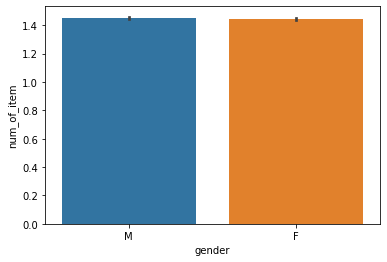

In [ ]:
# Menghitung jumlah user berdasarkan gender

sns.barplot( df['gender'],df['num_of_item'])

In [ ]:
# menghitung jumlah gender

df['gender'].value_counts().to_frame()

,gender
F,62288
M,62224


Dapat di simpulkan jumlah user Female lebih banyak di bandingkan Male. Namun terlihat bahwa perbedaan tidak terlalu banyak, ini bisa diartikan hampir seimbang.

In [ ]:
# Menghitung jumlah user berdasarkan negara

df['country'].value_counts().to_frame()

,country
China,42467
United States,27454
Brasil,18242
South Korea,6588
France,5901
United Kingdom,5762
Germany,5375
Spain,5153
Japan,2932
Australia,2825


Bisa disimpulkan bahwa negara China sangat berpengaruh pada jumlah user dan berpotensi sangat baik. Namun berbeda jauh dengan 3 negara terendah, sangat kecil jumlah user. Oleh karena itu harus ada peningkatan lagi yang bisa menarik user untuk join.

In [ ]:
df['traffic_source'].value_counts().to_frame()

,traffic_source
Search,87243
Organic,18574
Facebook,7682
Email,6067
Display,4946


Search sangat mendominasi pada pencarian user mendapat situs pada perusahaan.

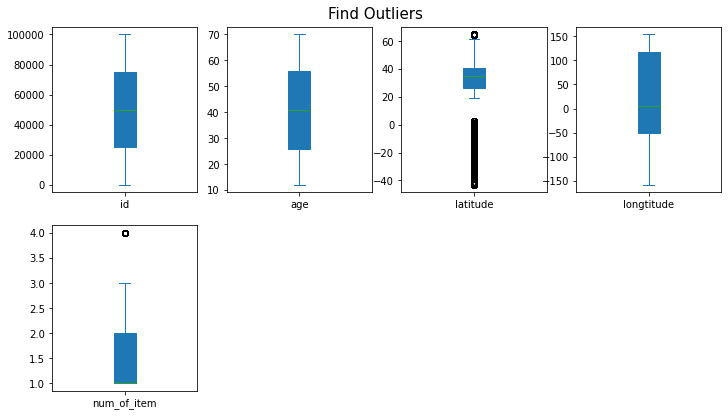

In [ ]:
# Mengecek jika terdapat outlier
# select columns to plot
df_to_plot = df.drop(columns=['gender', 'country', 'traffic_source']).select_dtypes(include=np.number)
# subplots
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.suptitle('Find Outliers', fontsize=15, y=0.9)
plt.savefig('boxplots.png', bbox_inches='tight')

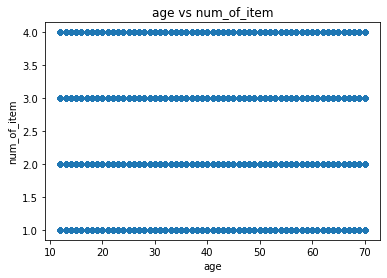

In [ ]:
df.plot(x='age', y='num_of_item', kind='scatter')
plt.title("age vs num_of_item");

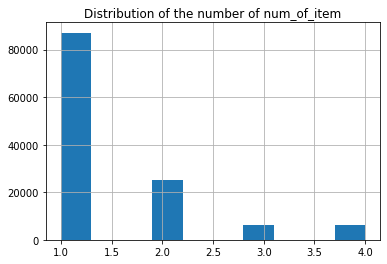

In [ ]:
df.num_of_item.hist()
plt.title("Distribution of the number of num_of_item");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


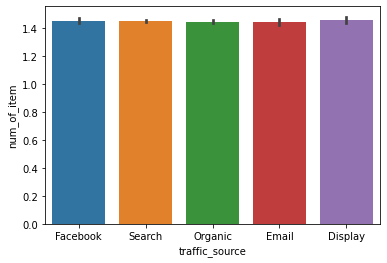

In [ ]:
sns.barplot( df['traffic_source'],df['num_of_item'])

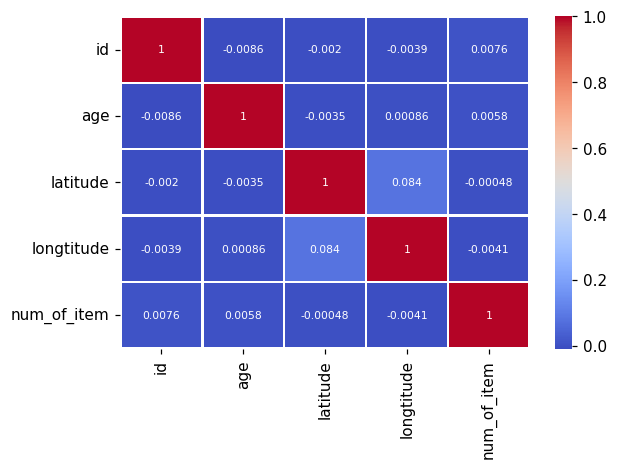

In [ ]:
# Untuk mengetahui korelasi antar variable

plt.figure(dpi=110)
sns.heatmap(df.corr(), linewidths=1,cmap="coolwarm",annot=True, annot_kws={'size':7})

In [ ]:
df.corr()['num_of_item'].sort_values()

longtitude    -0.004094
latitude      -0.000479
age            0.005823
id             0.007610
num_of_item    1.000000
Name: num_of_item, dtype: float64

In [ ]:
# 0 = Female
# 1 = Male
enc = OneHotEncoder()
# transforming the column after fitting
enc = enc.fit_transform(df[['gender']]).toarray()
# converting arrays to a dataframe
encoded_colm = pd.DataFrame(enc)
# concatenating dataframes
df = pd.concat([df, encoded_colm], axis = 1)
# removing the encoded column.
df = df.drop(['gender'], axis = 1)
df.head(5)

,id,age,country,latitude,longtitude,traffic_source,created_at,num_of_item,0,1
0,77905,70,United States,64.748506,-147.342360,Facebook,2022-02-26,4,0.0,1.0
1,77905,70,United States,64.748506,-147.342360,Facebook,2022-02-26,1,0.0,1.0
2,60393,70,China,28.230143,112.973400,Search,2021-04-26,1,1.0,0.0
3,60393,70,China,28.230143,112.973400,Search,2021-04-26,1,1.0,0.0
4,43215,70,Brasil,-10.251140,-40.709464,Search,2021-09-27,1,0.0,1.0


In [ ]:
df['country']

0         United States
1         United States
2                 China
3                 China
4                Brasil
              ...      
124507      South Korea
124508            China
124509            China
124510            China
124511    United States
Name: country, Length: 124512, dtype: object

In [ ]:
df.loc[:, ['id', 'age', 'country', 'num_of_item', 'created_at']].head()

,id,age,country,num_of_item,created_at
0,77905,70,United States,4,2022-02-26
1,77905,70,United States,1,2022-02-26
2,60393,70,China,1,2021-04-26
3,60393,70,China,1,2021-04-26
4,43215,70,Brasil,1,2021-09-27


Pada permasalahan ini Variable Dependen yang digunakan adalah "age", sedangkan Variable Independen adalah "num_of_item", "gender", "country", "traffic_source", "created_at" .

# **Checkpoint 4 - Modeling**
● Telah memisahkan data training, development, dan testing

● Memilih dan menerapkan 1 atau lebih model yang sesuai

● Menjelaskan alasan dalam memilih model (contoh dengan menggunakan metode Literature Review)

● Menjelaskan metric untuk evaluasi performa model

● Mempresentasikan visualisasi (jika ada)

# **Checkpoint 4 - Modeling(K-Modes Clustering)**

In [ ]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final.csv')
df

,id,age,gender,country,latitude,longtitude,traffic_source,created_at,num_of_item
0,77905,70,M,United States,64.748506,-147.342360,Facebook,2022-02-26,4
1,77905,70,M,United States,64.748506,-147.342360,Facebook,2022-02-26,1
2,60393,70,F,China,28.230143,112.973400,Search,2021-04-26,1
3,60393,70,F,China,28.230143,112.973400,Search,2021-04-26,1
4,43215,70,M,Brasil,-10.251140,-40.709464,Search,2021-09-27,1
...,...,...,...,...,...,...,...,...,...
124507,36487,12,F,South Korea,37.484815,126.894975,Search,2019-02-06,1
124508,20451,12,M,China,39.974395,116.407585,Search,2022-01-29,1
124509,23717,12,M,China,39.858418,116.254091,Search,2020-09-30,1
124510,20451,12,M,China,39.974395,116.407585,Search,2022-01-29,1


In [ ]:
df_cust = df[['age','gender', 'country', 'traffic_source', 'num_of_item']]
df_cust

,age,gender,country,traffic_source,num_of_item
0,70,M,United States,Facebook,4
1,70,M,United States,Facebook,1
2,70,F,China,Search,1
3,70,F,China,Search,1
4,70,M,Brasil,Search,1
...,...,...,...,...,...
124507,12,F,South Korea,Search,1
124508,12,M,China,Search,1
124509,12,M,China,Search,1
124510,12,M,China,Search,1


In [ ]:
df_cust['age_bin'] = pd.cut(df_cust['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
df_cust  = df_cust.drop('age',axis = 1)

In [ ]:
df_cust.head()

,gender,country,traffic_source,num_of_item,age_bin
0,M,United States,Facebook,4,60-70
1,M,United States,Facebook,1,60-70
2,F,China,Search,1,60-70
3,F,China,Search,1,60-70
4,M,Brasil,Search,1,60-70


In [ ]:
df_cust=df_cust.drop(['num_of_item'],axis=1)
df_cust

,gender,country,traffic_source,age_bin
0,M,United States,Facebook,60-70
1,M,United States,Facebook,60-70
2,F,China,Search,60-70
3,F,China,Search,60-70
4,M,Brasil,Search,60-70
...,...,...,...,...
124507,F,South Korea,Search,0-20
124508,M,China,Search,0-20
124509,M,China,Search,0-20
124510,M,China,Search,0-20


In [ ]:
df_cust.shape

(124512, 4)

In [ ]:
df_cust.describe()

,gender,country,traffic_source,age_bin
count,124512,124512,124512,124512
unique,2,15,5,6
top,F,China,Search,50-60
freq,62288,42467,87243,21375


In [ ]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124512 entries, 0 to 124511
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   gender          124512 non-null  object  
 1   country         124512 non-null  object  
 2   traffic_source  124512 non-null  object  
 3   age_bin         124512 non-null  category
dtypes: category(1), object(3)
memory usage: 3.0+ MB


In [ ]:
# Checking Null values
df_cust.isnull().sum()*100/df_cust.shape[0]
# There are no NULL values in the dataset, hence it is clean.

gender            0.0
country           0.0
traffic_source    0.0
age_bin           0.0
dtype: float64

In [ ]:
df_cust_copy = df_cust.copy()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_cust = df_cust.apply(le.fit_transform)
df_cust.head()

,gender,country,traffic_source,age_bin
0,1,14,2,5
1,1,14,2,5
2,0,4,4,5
3,0,4,4,5
4,1,3,4,5


In [ ]:
pip uninstall kmodes && pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing Libraries

from kmodes.kmodes import KModes

In [ ]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 224079.0


In [ ]:
# Predicted Clusters
fitClusters_cao

array([1, 1, 0, ..., 0, 0, 1], dtype=uint16)

In [ ]:
print(km_cao.cluster_centroids_)

[[ 0  4  4  4]
 [ 1 14  4  3]]


In [ ]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df_cust.columns

In [ ]:
# Mode of the clusters
clusterCentroidsDf

,gender,country,traffic_source,age_bin
0,0,4,4,4
1,1,14,4,3


In [ ]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(df_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 23077, cost: 225444.0
Run 1, iteration: 2/100, moves: 22798, cost: 225444.0


In [ ]:
# Predicted clusters
fitClusters_huang

array([0, 0, 0, ..., 0, 0, 1], dtype=uint16)

In [ ]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df_cust)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 284675.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 224079.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 206547.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 192279.0


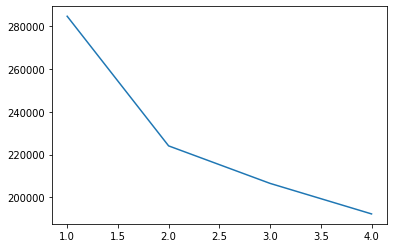

In [ ]:
# elbow method
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [ ]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 224079.0


In [ ]:
fitClusters_cao

array([1, 1, 0, ..., 0, 0, 1], dtype=uint16)

In [ ]:
df_cust = df_cust_copy.reset_index()

In [ ]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df_cust, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [ ]:
combinedDf.head()

,gender,country,traffic_source,age_bin,cluster_predicted
0,M,United States,Facebook,60-70,1
1,M,United States,Facebook,60-70,1
2,F,China,Search,60-70,0
3,F,China,Search,60-70,0
4,M,Brasil,Search,60-70,1


In [ ]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]

In [ ]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82146 entries, 2 to 124510
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             82146 non-null  object  
 1   country            82146 non-null  object  
 2   traffic_source     82146 non-null  object  
 3   age_bin            82146 non-null  category
 4   cluster_predicted  82146 non-null  uint16  
dtypes: category(1), object(3), uint16(1)
memory usage: 2.7+ MB


In [ ]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42366 entries, 0 to 124511
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             42366 non-null  object  
 1   country            42366 non-null  object  
 2   traffic_source     42366 non-null  object  
 3   age_bin            42366 non-null  category
 4   cluster_predicted  42366 non-null  uint16  
dtypes: category(1), object(3), uint16(1)
memory usage: 1.4+ MB


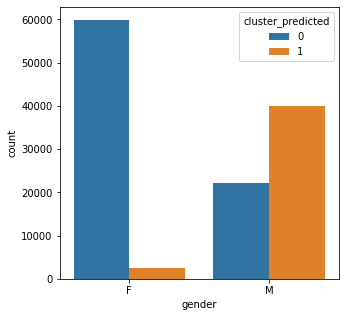

In [ ]:
plt.subplots(figsize = (5,5))
sns.countplot(x=combinedDf['gender'],order=combinedDf['gender'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

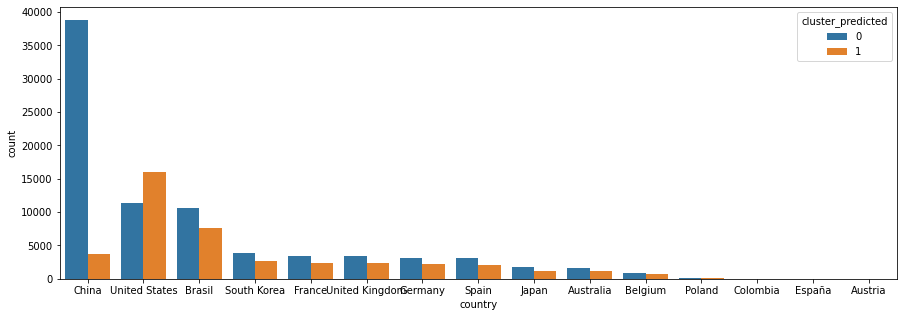

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['country'],order=combinedDf['country'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

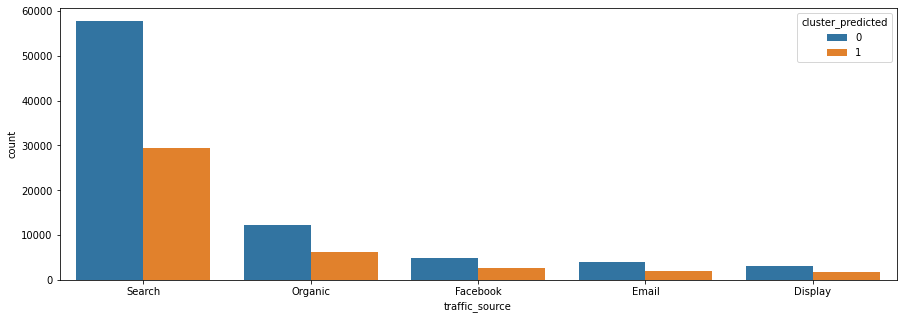

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['traffic_source'],order=combinedDf['traffic_source'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

# **Checkpoint 4 - Modeling(Simple Linear Regression)**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final.csv')

In [ ]:
from datetime import datetime, timedelta
# Choosing close column
df = df[['created_at', 'age']]
# Changing the index to date
df['created_at'] = pd.to_datetime(df['created_at'])
# Reseting the index
df = df.reset_index(drop=True)
df.head()

,created_at,age
0,2022-02-26,70
1,2022-02-26,70
2,2021-04-26,70
3,2021-04-26,70
4,2021-09-27,70


In [ ]:
# Split data into train 80% and test 20%

# train, test = train_test_split(df, test_size=0.20)

In [ ]:
# split data train 80% dan test 20%
from sklearn.model_selection import train_test_split
X = df['age']
Y = df['created_at']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 101)

print("test samples:", X_test.shape[0])
print("training samples:",X_train.shape[0])

test samples: 24903
training samples: 99609


In [ ]:
# Reshape index column to 2D array for .fit() method

X_train = np.array(train.index).reshape(-1, 1)
y_train = train['age']

In [ ]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)    

LinearRegression()

In [ ]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  -0.0004731810654277487
Intercept:  70.5015426684898


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  


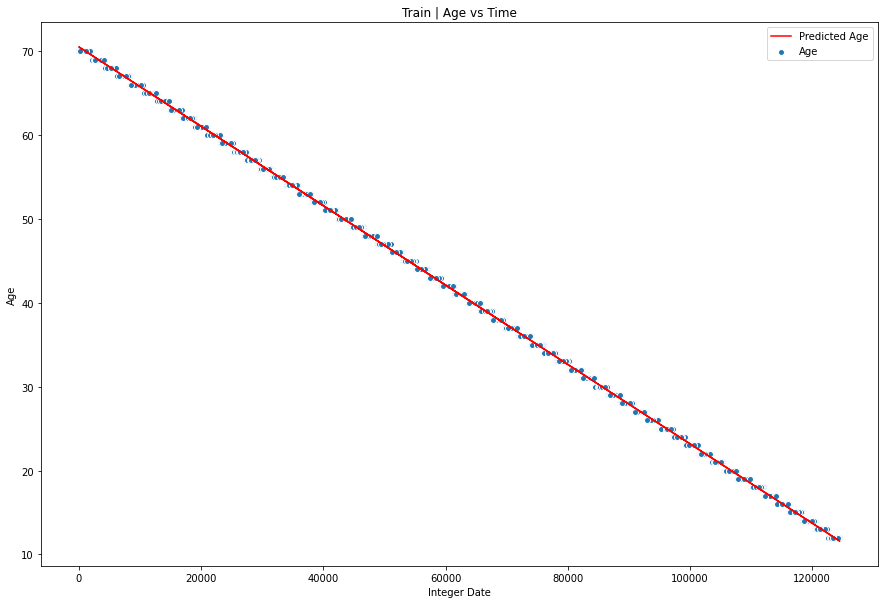

In [ ]:
# Train set graph
plt.figure(1, figsize=(15,10))
plt.title('Train | Age vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Age')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Age')
plt.xlabel('Integer Date')
plt.ylabel('Age')
plt.legend()
plt.show()

In [ ]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['age']

In [ ]:
# Generate array with predicted values
y_pred = model.predict(X_test)

In [ ]:
# Add new column for predictions to df
df['prediction'] = model.predict(np.array(df.index).reshape(-1, 1))

In [ ]:
# Get number of rows in data set for random sample
df.shape

(124512, 3)

In [ ]:
# Generate 100 random numbers
randints = np.random.randint(2550, size=50)

# Select row numbers == random numbers
df_sample = df[df.index.isin(randints)]

In [ ]:
df_sample.head()

,created_at,age,prediction
1,2022-02-26,70,70.501069
126,2020-07-11,70,70.441922
149,2019-02-22,70,70.431039
173,2019-10-26,70,70.419682
176,2021-08-29,70,70.418263


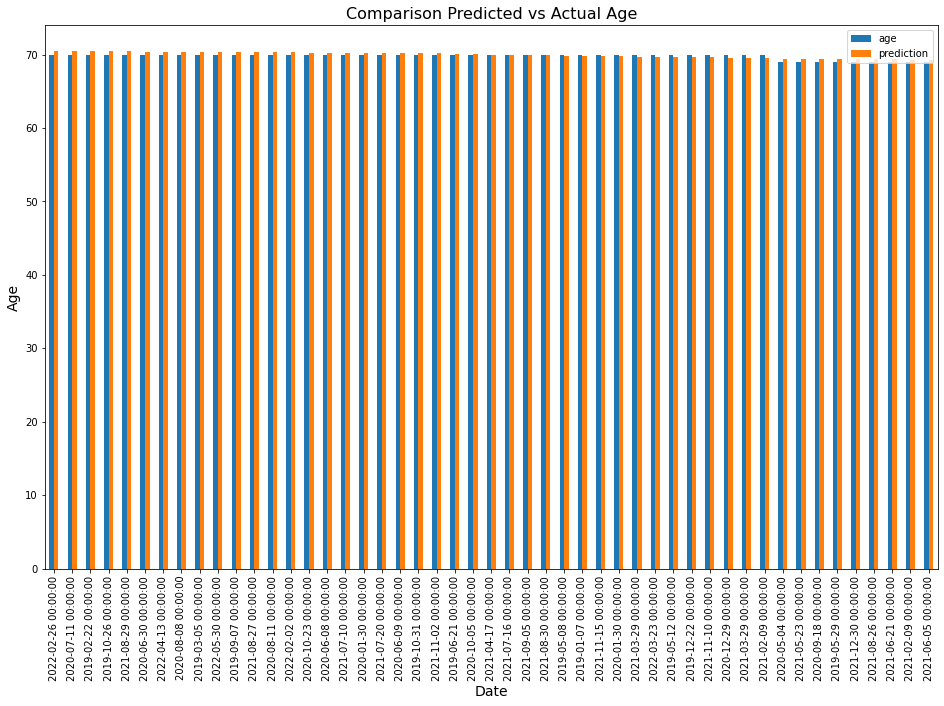

In [ ]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
df_sample.plot(x='created_at', y=['age', 'prediction'], kind='bar', ax=ax)

# Set figure title
plt.title('Comparison Predicted vs Actual Age', fontsize=16)

# Set x label
plt.xlabel('Date', fontsize=14)

# Set y label
plt.ylabel('Age', fontsize=14)

# Show plot
plt.show()

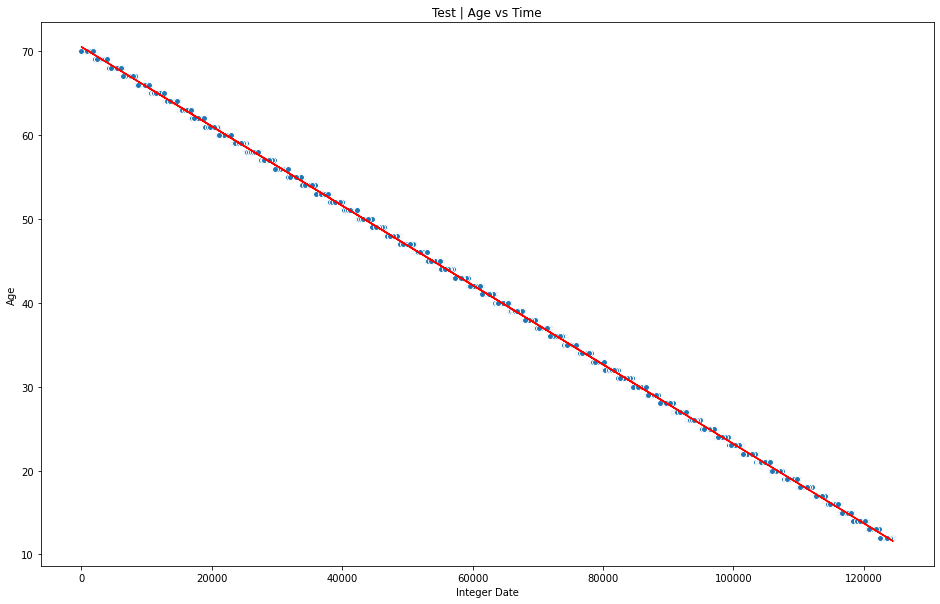

In [ ]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('Test | Age vs Time')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Age')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Age')
plt.xlabel('Integer Date')
plt.ylabel('Age')
plt.show()

In [ ]:
# melihat seberapa besar error pada variale yang digunakan
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2519101883449917
Mean Squared Error: 0.08543140303112301
Root Mean Squared Error: 0.2922865084657912


In [ ]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.9997037620416841


In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.999703046947041

R-squared dari variabel created_at memiliki nilai yang tinggi yaitu 0.999 atau 99.9%. Dapat dikatakan bahwa variabel ini punya kontribusi yang besar dalam menentukan umur user pada 4 tahun terakhir.

In [ ]:
# Importing pickle to save the model that we trained

import pickle

Save the model to disk

filename = 'linear_regression_stock_price.sav'
pickle.dump(model, open(filename, 'wb'))

# **Checkpoint 4 - Modeling(Simple Linear Regression 2)**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final.csv')

In [ ]:
df

,id,age,gender,country,latitude,longtitude,traffic_source,created_at,num_of_item
0,77905,70,M,United States,64.748506,-147.342360,Facebook,2022-02-26,4
1,77905,70,M,United States,64.748506,-147.342360,Facebook,2022-02-26,1
2,60393,70,F,China,28.230143,112.973400,Search,2021-04-26,1
3,60393,70,F,China,28.230143,112.973400,Search,2021-04-26,1
4,43215,70,M,Brasil,-10.251140,-40.709464,Search,2021-09-27,1
...,...,...,...,...,...,...,...,...,...
124507,36487,12,F,South Korea,37.484815,126.894975,Search,2019-02-06,1
124508,20451,12,M,China,39.974395,116.407585,Search,2022-01-29,1
124509,23717,12,M,China,39.858418,116.254091,Search,2020-09-30,1
124510,20451,12,M,China,39.974395,116.407585,Search,2022-01-29,1


In [ ]:
df.describe()

,id,age,latitude,longtitude,num_of_item
count,124512.000000,124512.000000,124512.000000,124512.000000,124512.000000
mean,50050.013613,41.043514,28.240767,25.401456,1.449724
std,28800.914580,17.010298,22.173353,89.694226,0.802567
min,1.000000,12.000000,-43.160756,-158.164931,1.000000
25%,25151.000000,26.000000,26.083985,-50.000131,1.000000
50%,50071.500000,41.000000,35.220110,4.837396,1.000000
75%,74949.250000,56.000000,40.725810,116.407585,2.000000
max,100000.000000,70.000000,64.865194,153.533010,4.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124512 entries, 0 to 124511
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              124512 non-null  int64  
 1   age             124512 non-null  int64  
 2   gender          124512 non-null  object 
 3   country         124512 non-null  object 
 4   latitude        124512 non-null  float64
 5   longtitude      124512 non-null  float64
 6   traffic_source  124512 non-null  object 
 7   created_at      124512 non-null  object 
 8   num_of_item     124512 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 8.5+ MB


Text(0, 0.5, 'umur')

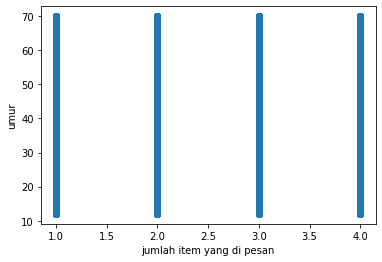

In [ ]:
plt.scatter(df['num_of_item'],df['age'])
plt.xlabel('jumlah item yang di pesan')
plt.ylabel('umur')

In [ ]:
x = df.iloc[:, [8]].values
y = df.iloc[:, [1]].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regresi = LinearRegression()

In [ ]:
regresi.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_estimasi = regresi.predict(x_test)

In [ ]:
y_estimasi

array([[40.97818156],
       [40.97818156],
       [40.97818156],
       ...,
       [41.14847884],
       [40.97818156],
       [40.97818156]])

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [ ]:
print("MAE : ", mean_absolute_error(y_test,y_estimasi))
print('Mean Squared Error:', mean_squared_error(y_test, y_estimasi))  
print("R2 : ", r2_score(y_test,y_estimasi))

MAE :  14.694309905215116
Mean Squared Error: 288.61155014522546
R2 :  -0.00019314752507160193


In [ ]:
data_baru = [[4]]
estimasi_baru = regresi.predict(data_baru)
print(estimasi_baru)

[[41.48907341]]


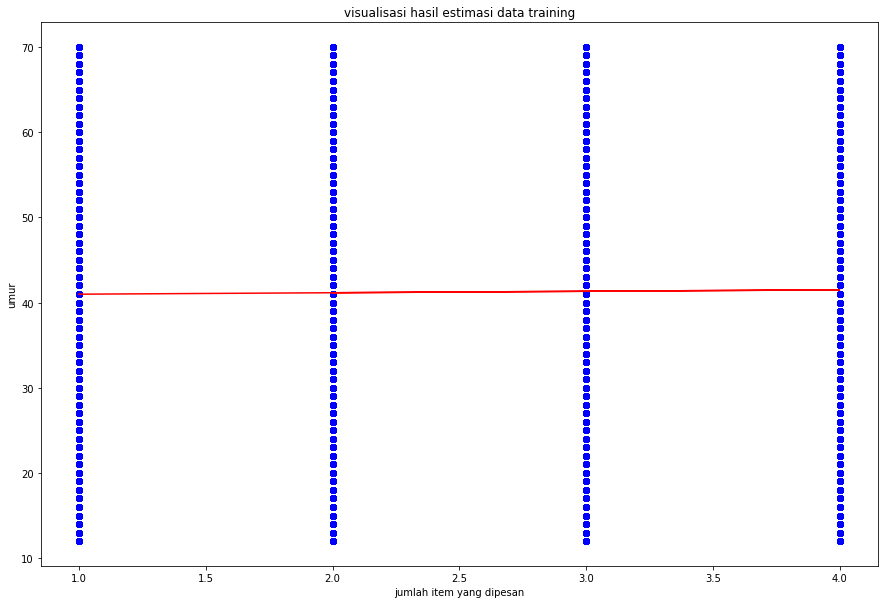

In [ ]:
# visualisasi data training
plt.figure(figsize=(15,10))
plt.title('visualisasi hasil estimasi data training')
plt.scatter(x_train,y_train,c='blue')
plt.plot(x_train,regresi.predict(x_train),c='red')
plt.xlabel('jumlah item yang dipesan')
plt.ylabel('umur')
plt.show()

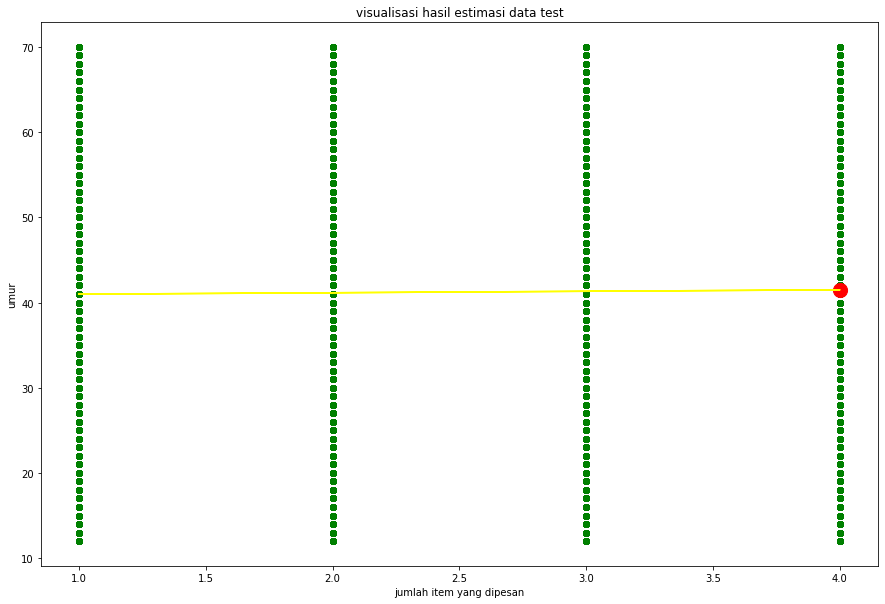

In [ ]:
# visualiasasi data test
plt.figure(figsize=(15,10))
plt.title('visualisasi hasil estimasi data test')
plt.scatter(x_test,y_test,c='green')
plt.plot(x_test,y_estimasi,c='yellow')

plt.scatter(data_baru,estimasi_baru,s=200,c='red')

plt.xlabel('jumlah item yang dipesan')
plt.ylabel('umur')
plt.show()